<b>Linear SVM Classifier

SVM classifier as fits the widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.

Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the support vectors (they are circled in fig)

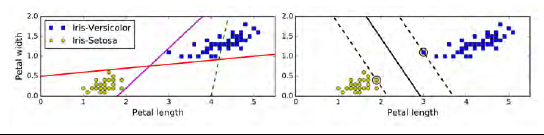

SVM is sensitive to feature scales

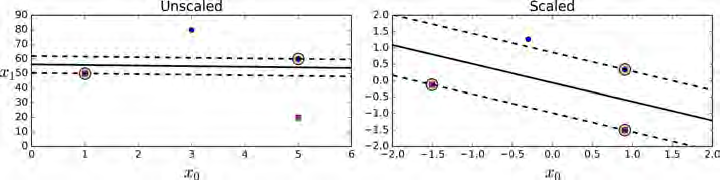

Soft Margin Classification

If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classification.
First, it only works if the data is linearly separable, and second it is quite sensitive
to outliers

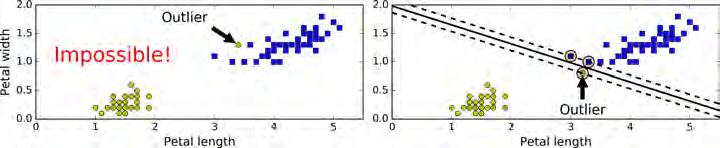

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.

In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter:
a smaller C value leads to a wider street but more margin violations.

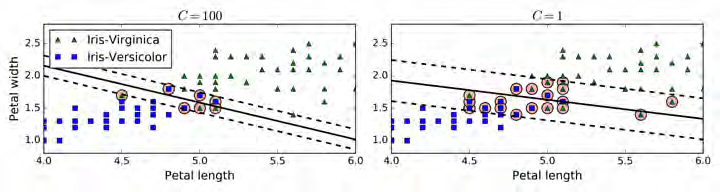

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it
is much slower, especially with large training sets, so it is not recommended. Another
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core training),
or to handle online classification tasks.

The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you scale the data using the StandardScaler. Moreover, make sure
you set the loss hyperparameter to "hinge", as it is not the default
value. Finally, for better performance you should set the dual
hyperparameter to False, unless there are more features than
training instances

<b>Nonlinear SVM Classification

One approach to handling nonlinear datasets is to add more features, such as polynomial features

<b>Polynomial Kernel</b>

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree
polynomials, without actually having to add them. So there is no combinatorial
explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

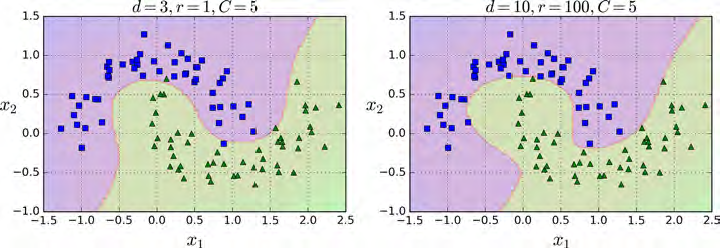

The hyperparameter coef0 controls how much the model is influenced by highdegree
polynomials versus low-degree polynomials.

<b>Adding Similarity Features</b>

Another technique to tackle nonlinear problems is to add features computed using a
similarity function that measures how much each instance resembles a particular
landmark. For example, let’s take the one-dimensional dataset discussed earlier and
add two landmarks to it at x1 = –2 and x1 = 1 (see the left plot). Next,
let’s define the similarity function to be the Gaussian Radial Basis Function (RBF)
with γ = 0.3.

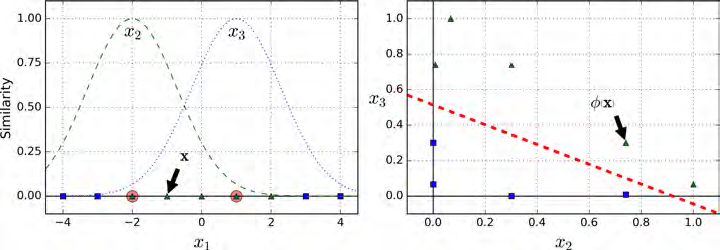

It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at
the landmark). Now we are ready to compute the new features. For example, let’s look
at the instance x1 = –1: it is located at a distance of 1 from the first landmark, and 2
from the second landmark. Therefore its new features are x2 = exp (–0.3 × 12) ≈ 0.74
and x3 = exp (–0.3 × 22) ≈ 0.30. The plot on the right shows the transformed
dataset (dropping the original features). As you can see, it is now linearly
separable.


You may wonder how to select the landmarks. The simplest approach is to create a
landmark at the location of each and every instance in the dataset. This creates many
dimensions and thus increases the chances that the transformed training set will be
linearly separable. The downside is that a training set with m instances and n features
gets transformed into a training set with m instances and m features (assuming you
drop the original features). If your training set is very large, you end up with an
equally large number of features.

<b>Gaussian RBF Kernel</b>

Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets. However, once
again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add
them. Let’s try the Gaussian RBF kernel using the SVC class:

In [9]:
rbf_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This model is represented on the bottom left of fig. The other plots show
models trained with different values of hyperparameters gamma (γ) and C. Increasing
gamma makes the bell-shape curve narrower (see the left plot of Figure), and as a
result each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider, so instances have a larger range of influence,
and the decision boundary ends up smoother. So γ acts like a regularization
hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting,
you should increase it (similar to the C hyperparameter).

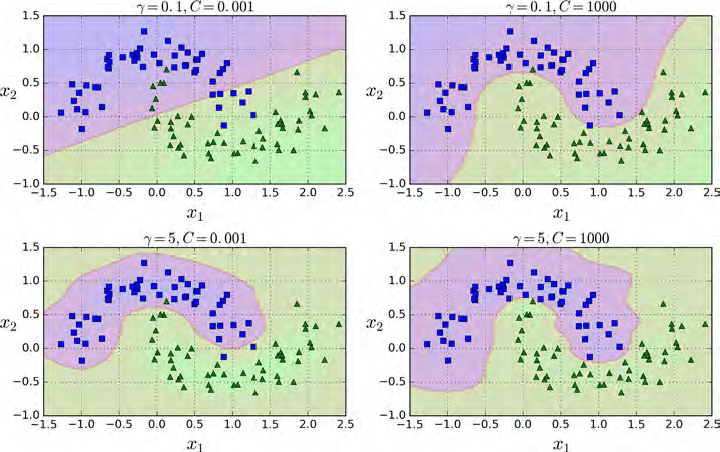

With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.
Then if you have spare time and computing power, you can also
experiment with a few other kernels using cross-validation and grid
search, especially if there are kernels specialized for your training
set’s data structure.

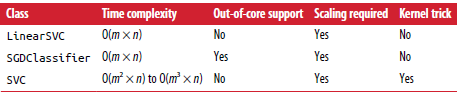

<b>SVM Regression</b>

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support
linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest possible
street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street). The width of the street is controlled by a hyperparameter
ϵ.

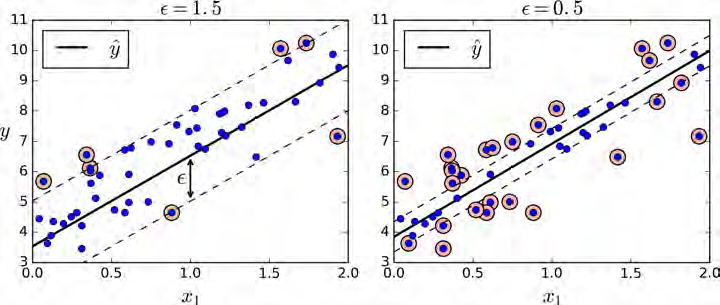

Adding more training instances within the margin does not affect the model’s predictions;
thus, the model is said to be ϵ-insensitive.
You can use Scikit-Learn’s LinearSVR class to perform linear SVM Regression. The
following code produces the model represented on the left of Figure 5-10 (the training
data should be scaled and centered first):

To tackle nonlinear regression tasks, you can use a kernelized SVM model. For example,
Figure 5-11 shows SVM Regression on a random quadratic training set, using a
2nd-degree polynomial kernel. There is little regularization on the left plot (i.e., a large
C value), and much more regularization on the right plot (i.e., a small C value).

In [11]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

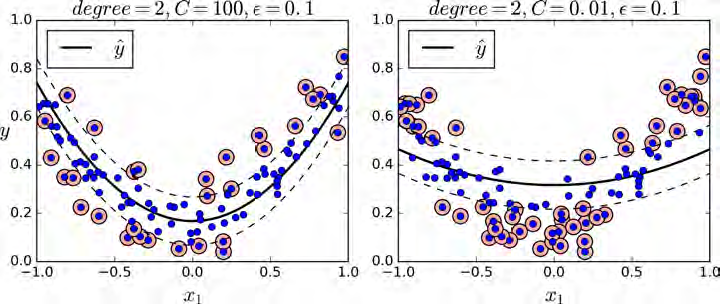

To tackle nonlinear regression tasks, you can use a kernelized SVM model. For example,
Figure shows SVM Regression on a random quadratic training set, using a
2nd-degree polynomial kernel. There is little regularization on the left plot (i.e., a large
C value), and much more regularization on the right plot (i.e., a small C value).

The following code produces the model represented on the left of Figure 5-11 using
Scikit-Learn’s SVR class (which supports the kernel trick). The SVR class is the regression
equivalent of the SVC class, and the LinearSVR class is the regression equivalent
of the LinearSVC class. The LinearSVR class scales linearly with the size of the training
set (just like the LinearSVC class), while the SVR class gets much too slow when
the training set grows large (just like the SVC class).